# <center>ASAM performance on cifar10 dataset<center>

In [1]:
from utils_cifar import *
import os
%load_ext autoreload
%autoreload 2

seed = 0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

c:\Users\noam\epfl_courses\opt_ML\opt_ml_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True


## 0 : Loading of cifar10 dataset

In [2]:
BATCH_SIZE = 128

trainloader, testloader, classes = load_cifar(batch_size=BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified


##### Have a look at the dataset

In [3]:
# get some random training images
dataiter = iter(trainloader)
images_train, labels = dataiter.next()

# get some random testing images
dataiter = iter(trainloader)
images_test, labels = dataiter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


128


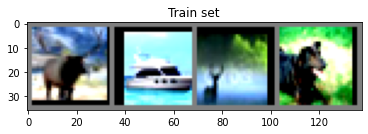

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


128


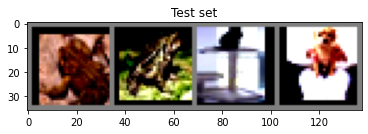

In [4]:
print(len(images_train))

# show images
plt.title('Train set')
imshow(torchvision.utils.make_grid(images_train[:4]))

print(len(images_test))

# show images
plt.title('Test set')
imshow(torchvision.utils.make_grid(images_test[:4]))

**MODIFY THIS CELL : choose your model and the number of epochs**

In [4]:
n_epochs = 50
model = 'wrn28_10'

assert model in ['Net', 'wrn28_10'], f"Invalid model. Please select 'net' or 'wrn28_10'"

## 1 : Training and testing with ADAM

Training...
[1,   100] loss: 0.088
[1,   200] loss: 0.075
[1,   300] loss: 0.067
Epoch: 1, Train accuracy:  46.59 %, Train loss:  0.01133
Epoch: 1, Test accuracy:   54.31 %, Test loss:   0.01024
[2,   100] loss: 0.056
[2,   200] loss: 0.052
[2,   300] loss: 0.050
Epoch: 2, Train accuracy:  63.46 %, Train loss:  0.00799
Epoch: 2, Test accuracy:   63.07 %, Test loss:   0.00861
[3,   100] loss: 0.044
[3,   200] loss: 0.043
[3,   300] loss: 0.041
Epoch: 3, Train accuracy:  70.32 %, Train loss:  0.00656
Epoch: 3, Test accuracy:   70.37 %, Test loss:   0.00706
[4,   100] loss: 0.037
[4,   200] loss: 0.035
[4,   300] loss: 0.034
Epoch: 4, Train accuracy:  75.91 %, Train loss:  0.00541
Epoch: 4, Test accuracy:   70.80 %, Test loss:   0.00692
[5,   100] loss: 0.031
[5,   200] loss: 0.030
[5,   300] loss: 0.029
Epoch: 5, Train accuracy:  79.47 %, Train loss:  0.00461
Epoch: 5, Test accuracy:   73.98 %, Test loss:   0.00624
[6,   100] loss: 0.027
[6,   200] loss: 0.026
[6,   300] loss: 0.024
Epoc

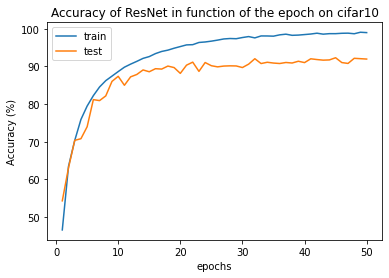

Save the model...
Done


In [6]:
if(model=='wrn28_10') :
    torch.manual_seed(seed)
    net = wrn28_10(num_classes=10).to(device)
else :
    torch.manual_seed(seed)
    net = Net().to(device)

#Network you want to load, if it exists
DIR_NAME = './'
FILE_NAME = 'net'
PATH = DIR_NAME + FILE_NAME + '.pth'

if(os.path.exists(PATH)) :
    #Load pre-trained weights
    print('Loading of the pre-trained network', FILE_NAME, '...')
    net.load_state_dict(torch.load(PATH))
    print('Done')
    #Testing
    print('')
    print('Testing...')
    test(testloader, model=net)
else : 
    #Train the network and save it
    print('Training...')
    train_ADAM(trainloader, testloader, model=net, epochs=n_epochs)
    print('Save the model...')
    save_model(net, 'net')
    print('Done')

In [7]:
#Testing for each class of cifar10
test_classes(testloader, net, classes = classes) 

Accuracy for class: plane is 88.4 %
Accuracy for class: car   is 98.3 %
Accuracy for class: bird  is 90.5 %
Accuracy for class: cat   is 80.8 %
Accuracy for class: deer  is 95.2 %
Accuracy for class: dog   is 88.1 %
Accuracy for class: frog  is 94.9 %
Accuracy for class: horse is 95.1 %
Accuracy for class: ship  is 96.1 %
Accuracy for class: truck is 92.1 %


## 2 : Training and testing with ASAM

Training...
[1,   100] loss: 0.016
[1,   200] loss: 0.014
[1,   300] loss: 0.013
Epoch: 1, Train accuracy:  40.04 %, Train loss:  0.01380
Epoch: 1, Test accuracy:   46.98 %, Test loss:   0.01325
[2,   100] loss: 0.011
[2,   200] loss: 0.011
[2,   300] loss: 0.010
Epoch: 2, Train accuracy:  62.30 %, Train loss:  0.01050
Epoch: 2, Test accuracy:   65.93 %, Test loss:   0.01044
[3,   100] loss: 0.010
[3,   200] loss: 0.009
[3,   300] loss: 0.009
Epoch: 3, Train accuracy:  70.59 %, Train loss:  0.00918
Epoch: 3, Test accuracy:   70.82 %, Test loss:   0.00936
[4,   100] loss: 0.008
[4,   200] loss: 0.008
[4,   300] loss: 0.008
Epoch: 4, Train accuracy:  76.82 %, Train loss:  0.00814
Epoch: 4, Test accuracy:   68.85 %, Test loss:   0.00955
[5,   100] loss: 0.008
[5,   200] loss: 0.008
[5,   300] loss: 0.008
Epoch: 5, Train accuracy:  80.06 %, Train loss:  0.00761
Epoch: 5, Test accuracy:   77.11 %, Test loss:   0.00821
[6,   100] loss: 0.007
[6,   200] loss: 0.007
[6,   300] loss: 0.007
Epoc

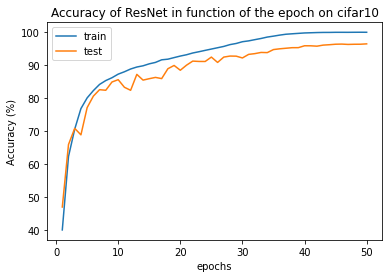

Save the model...
Done


In [4]:
if(model=='wrn28_10') :
    torch.manual_seed(seed)
    net_asam = wrn28_10(num_classes=10).to(device)
else :
    torch.manual_seed(seed)
    net_asam = Net().to(device)

#Network you want to load, if it exists
DIR_NAME = './'
FILE_NAME = 'net_asam'
PATH = DIR_NAME + FILE_NAME + '.pth'

if(os.path.exists(PATH)) :
    #Load pre-trained weights
    print('Loading of the pre-trained network', FILE_NAME, '...')
    net_asam.load_state_dict(torch.load(PATH))
    print('Done')
    #Testing
    print('')
    print('Testing...')
    test(testloader, model=net_asam)
else : 
    #Train the network and save it
    print('Training...')
    train_minimizer(trainloader, testloader, model=net_asam, minimizer=ASAM, epochs=n_epochs, rho_=0.5, smoothing_=0.1)
    print('Save the model...')
    save_model(net_asam, 'net_asam')
    print('Done')

In [25]:
#Testing for each class of cifar10
test_classes(testloader, model=net_asam, classes = classes) 

Accuracy for class: plane is 54.0 %
Accuracy for class: car   is 3.3 %
Accuracy for class: bird  is 2.1 %
Accuracy for class: cat   is 34.2 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 21.6 %
Accuracy for class: frog  is 76.3 %
Accuracy for class: horse is 11.4 %
Accuracy for class: ship  is 23.2 %
Accuracy for class: truck is 66.2 %


## 3 : Training and testing with SAM

Training...
[1,   100] loss: 0.016
[1,   200] loss: 0.014
[1,   300] loss: 0.013
Epoch: 1, Train accuracy:  39.89 %, Train loss:  0.01378
Epoch: 1, Test accuracy:   45.95 %, Test loss:   0.01315
[2,   100] loss: 0.011
[2,   200] loss: 0.011
[2,   300] loss: 0.010
Epoch: 2, Train accuracy:  62.07 %, Train loss:  0.01056
Epoch: 2, Test accuracy:   66.65 %, Test loss:   0.01018
[3,   100] loss: 0.010
[3,   200] loss: 0.009
[3,   300] loss: 0.009
Epoch: 3, Train accuracy:  69.64 %, Train loss:  0.00932
Epoch: 3, Test accuracy:   71.35 %, Test loss:   0.00922
[4,   100] loss: 0.009
[4,   200] loss: 0.008
[4,   300] loss: 0.008
Epoch: 4, Train accuracy:  75.80 %, Train loss:  0.00834
Epoch: 4, Test accuracy:   73.21 %, Test loss:   0.00882
[5,   100] loss: 0.008
[5,   200] loss: 0.008
[5,   300] loss: 0.008
Epoch: 5, Train accuracy:  79.11 %, Train loss:  0.00775
Epoch: 5, Test accuracy:   76.30 %, Test loss:   0.00834
[6,   100] loss: 0.007
[6,   200] loss: 0.007
[6,   300] loss: 0.007
Epoc

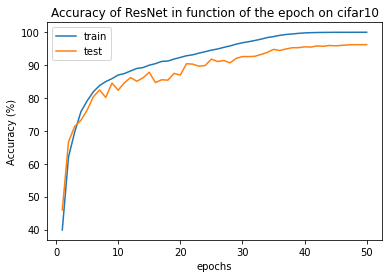

Save the model...
Done


In [5]:
if(model=='wrn28_10') :
    torch.manual_seed(seed)
    net_sam = wrn28_10(num_classes=10).to(device)
else :
    torch.manual_seed(seed)
    net_sam = Net().to(device)

#Network you want to load, if it exists
DIR_NAME = './'
FILE_NAME = 'net_sam'
PATH = DIR_NAME + FILE_NAME + '.pth'

if(os.path.exists(PATH)) :
    #Load pre-trained weights
    print('Loading of the pre-trained network', FILE_NAME, '...')
    net_sam.load_state_dict(torch.load(PATH))
    print('Done')
    #Testing
    print('')
    print('Testing...')
    test(testloader, model=net_sam)
else : 
    #Train the network and save it
    print('Training...')
    train_minimizer(trainloader, testloader, model=net_sam, minimizer=SAM, epochs=n_epochs, rho_=0.05, smoothing_=0.1)
    print('Save the model...')
    save_model(net_sam, 'net_sam')
    print('Done')

In [6]:
#Testing for each class of cifar10
test_classes(testloader, model=net_sam, classes = classes)

Accuracy for class: plane is 96.6 %
Accuracy for class: car   is 98.2 %
Accuracy for class: bird  is 94.9 %
Accuracy for class: cat   is 90.9 %
Accuracy for class: deer  is 97.4 %
Accuracy for class: dog   is 93.4 %
Accuracy for class: frog  is 98.7 %
Accuracy for class: horse is 97.2 %
Accuracy for class: ship  is 97.2 %
Accuracy for class: truck is 97.4 %
